### Pre-processing mouse data
*This section is mostly copied over from the exploratory notebook and you will see this repeated at the beginning of most notebooks with slight modifications to adapt to specific needs in the current notebook. Feel free to skip to the actual beginning of this notebook [below](#Clustering-of-OTUs:-using-sequence-alignments-and-Phylogenetic-tree-distances).*

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.patches
from scipy.stats import zscore

In [2]:
# load mouse data -- just playing with the healthy set for now
with open('data/mouse_set_1_data.pkl', 'rb') as handle:
    mouse_set_1 = pickle.load(handle) 

# extract dataframes
otu_taxonomy = mouse_set_1['otu_taxonomy']
reads = mouse_set_1['reads']
qpcr = mouse_set_1['qpcr']
times = mouse_set_1['times']

# perturbation time periods
high_fat = [22,28.5]
gram_pos = [36,42.5]
gram_neg = [51,57.5]

In [3]:
# organize mouse 2
mouse_id = '2'
mouse_reads_df = reads[mouse_id]
m_total_amount = qpcr[mouse_id]['mean'].values
all_OTU = list(mouse_reads_df.index)

m_reads_values=reads[mouse_id].values
m_reads_values_sum=sum(m_reads_values)

m_all_abs_amount = np.zeros((len(all_OTU), len(times)))
for idx, otu in enumerate(all_OTU):
    these_reads = mouse_reads_df.loc[otu]
    this_relative_abundance = these_reads.values/m_reads_values_sum
    this_abs_abundance = this_relative_abundance * m_total_amount
    
    m_all_abs_amount[idx,:] = this_abs_abundance
    
m_all_abs_amount_z = zscore(m_all_abs_amount, axis = 1)

In [4]:
# store absolute abundance as a pandas dataframe
df = pd.DataFrame(m_all_abs_amount, index=mouse_reads_df.index.values, columns=times)
display(df.head())
print(df.shape)

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,58.5,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5
OTU_1,3.258519e+06,1.435422e+07,1.398210e+10,3.741737e+07,6.611759e+07,3.981310e+08,7.523933e+08,3.601429e+09,6.517636e+09,2.555167e+09,...,7.389558e+09,4.872160e+09,7.579320e+09,1.177070e+10,4.967445e+09,2.115524e+09,5.711787e+09,2.029287e+08,1.957336e+09,6.490826e+09
OTU_2,5.361366e+05,3.597276e+06,1.074313e+10,8.726195e+08,1.406977e+09,2.274333e+09,1.557107e+09,3.872735e+09,2.126074e+09,7.952141e+08,...,2.241298e+08,8.608057e+07,0.000000e+00,5.738306e+08,4.153618e+09,1.231788e+08,2.051707e+09,1.583057e+08,2.944150e+09,1.129506e+10
OTU_3,2.978537e+04,3.488268e+04,8.017258e+07,5.234554e+06,1.652940e+07,1.144524e+07,2.502290e+07,6.309442e+07,7.062454e+07,3.170504e+07,...,2.241298e+07,2.065934e+07,1.477450e+07,1.434577e+08,1.162610e+07,3.724010e+07,5.670547e+07,1.416605e+06,1.629174e+07,2.044355e+08
OTU_4,8.935610e+03,0.000000e+00,7.215532e+07,6.203916e+06,2.896176e+07,1.038247e+08,1.114657e+08,4.555417e+08,9.841575e+08,5.635732e+08,...,1.640182e+10,2.152703e+10,4.139323e+10,6.686561e+10,7.022940e+09,1.756444e+10,5.639616e+10,2.149699e+09,2.288291e+10,6.900549e+10
OTU_5,1.787122e+04,5.668436e+04,1.563365e+09,1.002320e+08,1.051100e+08,1.922392e+09,3.196107e+09,1.084214e+10,1.064138e+10,7.750264e+09,...,2.241298e+06,0.000000e+00,0.000000e+00,0.000000e+00,3.100293e+06,1.432312e+06,5.155042e+06,2.833211e+06,2.327391e+06,0.000000e+00


(202, 75)


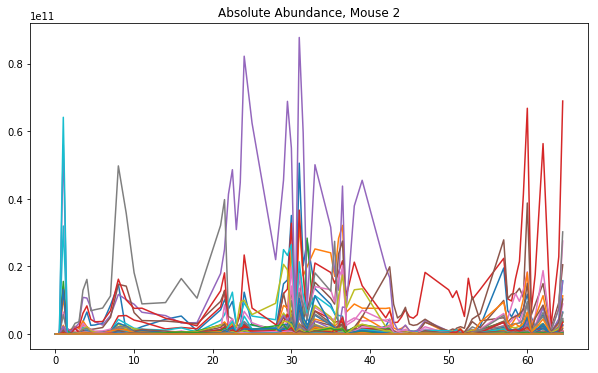

In [5]:
df.T.plot(kind='line', title='Absolute Abundance, Mouse 2', legend=False, figsize=(10,6))
plt.show()

In [6]:
np.seterr(divide = 'ignore') # to ignore log10(0) error since we will just ignore this for viz

# store log10-transformation of absolute abundance as another pandas dataframe (and ignoring first 4 time points)
log10_df = pd.DataFrame(np.log10(m_all_abs_amount[:,4:]), index=mouse_reads_df.index.values, columns=times[4:])
log10_df = log10_df.replace([np.inf, -np.inf], np.nan)
display(log10_df.head())

,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0,7.0,8.0,...,58.5,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5
OTU_1,7.820317,8.600026,8.876445,9.556475,9.814090,9.407419,9.424340,9.506993,9.929417,10.168373,...,9.868618,9.687722,9.879630,10.070802,9.696133,9.325418,9.756772,8.307344,9.291665,9.812300
OTU_2,9.148287,9.356854,9.192318,9.588018,9.327578,8.900484,8.559121,8.165689,8.043252,8.699504,...,8.350500,7.934905,NaN,8.758784,9.618427,8.090536,9.312115,8.199496,9.468960,10.052889
OTU_3,7.218257,7.058625,7.398338,7.799991,7.848956,7.501128,6.986005,7.666722,7.759807,8.442183,...,7.350500,7.315116,7.169513,8.156724,7.065434,7.571011,7.753625,6.151249,7.211967,8.310556
OTU_4,7.461825,8.016301,8.047141,8.658528,8.993065,8.750950,8.751007,8.727420,9.050019,9.727693,...,10.214892,10.332984,10.616929,10.825203,9.846519,10.244634,10.751250,9.332378,10.359511,10.838884
OTU_5,8.021644,9.283842,9.504621,10.035115,10.026998,9.889316,9.562286,9.422506,9.738329,10.068938,...,6.350500,NaN,NaN,NaN,6.491403,6.156037,6.712232,6.452279,6.366869,NaN


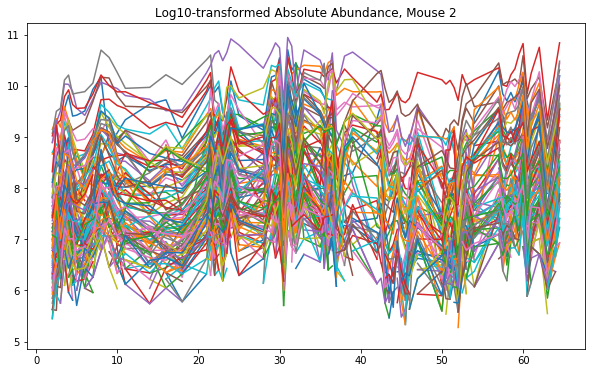

In [7]:
log10_df.T.plot(kind='line', title='Log10-transformed Absolute Abundance, Mouse 2', legend=False, figsize=(10,6))
plt.show()

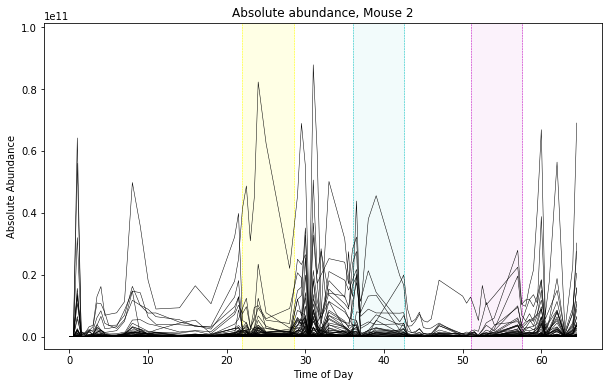

In [8]:
fig,ax = plt.subplots(1,1,figsize = (10,6))
ax.plot(times, m_all_abs_amount.T, linewidth = 0.5, c='k');

# shade the perturbation periods
y1,y2 = ax.get_ylim()
ax.vlines(x = high_fat, ymin = y1*0.9, ymax = y2*1.1, color = 'yellow', linewidth = 0.5, linestyle = '--')
ax.vlines(x = gram_pos, ymin = y1*0.9, ymax = y2*1.1, color = 'c', linewidth = 0.5, linestyle = '--')
ax.vlines(x = gram_neg, ymin = y1*0.9, ymax = y2*1.1, color = 'm', linewidth = 0.5, linestyle = '--')

rect1 = matplotlib.patches.Rectangle((high_fat[0],y1*0.9), high_fat[1]-high_fat[0],y2*1.1-y1*0.9, 
                                     color='yellow',alpha = 0.1)
rect2 = matplotlib.patches.Rectangle((gram_pos[0],y1*0.9), gram_pos[1]-gram_pos[0],y2*1.1-y1*0.9, 
                                     color='c',alpha = 0.05)
rect3 = matplotlib.patches.Rectangle((gram_neg[0],y1*0.9), gram_neg[1]-gram_neg[0],y2*1.1-y1*0.9, 
                                     color='m',alpha = 0.05)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.set_ylim([y1*0.9, y2*1.1])
ax.set(xlabel='Time of Day', ylabel = 'Absolute Abundance', title = 'Absolute abundance, Mouse 2');

## Clustering of OTUs: using sequence alignments and Phylogenetic tree distances

In this notebook, we want to determine clusters of OTUs based on the genetics of these OTUs. Namely, we want to use each OTU's genomic sequence information to:
1. calculate a distance matrix that quantifies their sequencing relationships from one another
2. construct a phylogenetic tree and use the branch lengths to calculate the distance matrix

Then, we can use these distance matrices to assign cluster memberships with the k-medoids clustering method, described further below. But for now, let's prepare our sequence data into a "Bio alignment object" so we can quickly apply all the necessary functions made available in the [Bio](https://biopython.org/DIST/docs/api/Bio-module.html) package.

In [9]:
# specific packages to import from Bio
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import *
from Bio.Align import MultipleSeqAlignment
from Bio.Cluster import *

In [10]:
# subset on a few OTUs first to play with
otu_tax = otu_taxonomy #[50:100]
# otu_tax

In [11]:
# Find the longest sequence length so we can add padding to sequences shorter than this
longest_length = max(len(s) for s in otu_tax['sequence'])
longest_length

254

In [12]:
# Iterate through the OTU_taxonomy dataframe to store their sequences into Bio SeqRecord objects
SeqRecordList = []
for i in range(otu_tax.shape[0]):
    record = SeqRecord(Seq(otu_tax['sequence'][i].ljust(longest_length, '-')), # left align, pad the end
                       id=str(otu_tax['Genus'][i])+"_"+str(otu_tax.index.values[i]), 
                       annotations={"Family": otu_tax['Family'][i], "Genus": otu_tax['Genus'][i]})
    SeqRecordList.append(record)
display(SeqRecordList[:5])

[SeqRecord(seq=Seq('TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATG...GG-'), id='Bacteroides_OTU_1', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTG...GG-'), id='Bacteroides_OTU_2', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCT...GG-'), id='Akkermansia_OTU_3', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCG...GG-'), id='Bacteroides_OTU_4', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCG...GG-'), id='Akkermansia_OTU_5', name='<unknown name>', description='<unknown description>', dbxrefs=[])]

In [13]:
# Store all SeqRecord objects into Bio alignment object
otu_aln = MultipleSeqAlignment(SeqRecordList)
print(otu_aln[:5])

Alphabet() alignment with 5 rows and 254 columns
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGG...GG- Bacteroides_OTU_1
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGG...GG- Bacteroides_OTU_2
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCG...GG- Akkermansia_OTU_3
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGG...GG- Bacteroides_OTU_4
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCG...GG- Akkermansia_OTU_5


### 1. Calculate distances of sequence alignments using 'identity' model

The 'identity' distance is a common measure of how similar OTUs are from one another based on their sequence alignments.

In [14]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(otu_aln)
# display(dm)

In [15]:
# save distance matrix as a pickle file
pickle.dump( dm, open( "OTU_dm.p", "wb" ) )

In [15]:
# load distance matrix from a pickle file
dm = pickle.load( open( "OTU_dm.p", "rb" ) )

In [16]:
np.array(dm).shape

(202, 202)

/usr/share/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/share/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.450e+02, 2.010e+02, 4.700e+02, 5.640e+02, 2.990e+02, 4.830e+02,
        1.112e+03, 1.093e+03, 1.019e+03, 8.190e+02, 2.187e+03, 2.069e+03,
        1.570e+03, 6.430e+02, 2.600e+02, 9.800e+01, 2.400e+01, 1.000e+00,
        4.000e+00, 1.100e+01, 5.000e+00, 4.500e+01, 6.000e+01, 1.100e+02,
        5.400e+02, 1.728e+03, 2.313e+03, 1.801e+03, 5.760e+02, 5.100e+01]),
 array([0.00393701, 0.02506562, 0.04619423, 0.06732283, 0.08845144,
        0.10958005, 0.13070866, 0.15183727, 0.17296588, 0.19409449,
        0.2152231 , 0.23635171, 0.25748031, 0.27860892, 0.29973753,
        0.32086614, 0.34199475, 0.36312336, 0.38425197, 0.40538058,
        0.42650919, 0.4476378 , 0.4687664 , 0.48989501, 0.51102362,
        0.53215223, 0.55328084, 0.57440945, 0.59553806, 0.61666667,
        0.63779528]),
 <a list of 30 Patch objects>)

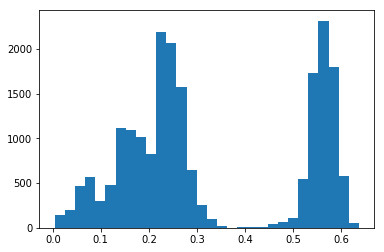

In [18]:
# checking distribution of the distances 
dm_tril = np.tril(dm) # grab the lower triangle of the matrix
dm_tril[dm_tril == 0] = np.nan # set zeros to nan
dm_tril = dm_tril.reshape(202*202) # reshape for plotting
plt.hist(dm_tril, bins=30)

Observation: it appears that the distance distribution is bimodal, indicating a distinction between the inter- vs intra-cluster distances. This means that the OTUs can be partitioned into two natural clusters with a large intercluster distance. We can probably further split the chunk on the left into two smaller clusters.

#### K-medoids clustering on the distance matrix

We have chosen a clustering method that is similar to but more robust than the widely used k-means, called k-medoids. This method minimizes the sum of the distances from the data points within a cluster to the "medoid", which is a chosen data point in the same cluster that can be thought of like a "median". We have specified below to run the EM algorithm 10 times, each time with a different random initial condition. From the best clustering solution out of the 10, we output the cluster assignment for each OTU and the within-cluster sum of distances.

In [19]:
# k-medoid clustering with 5 number of clusters -- eh, this looks too much...
kmclusters, err, _ = kmedoids(dm, nclusters=5, npass=10)
print(kmclusters)
print("---")
print("Within-cluster sum of distances:", err)

[  3   3 145   3 145 174   3   3   3   3   3   3   3   3 174   3 118 174
   3 174   3   3 145  24  24 118 174 118   3 145 174   3 118   3 118 118
  24 174 118 174 145   3 145  24 174   3 174 174   3   3  24 145 174   3
 145 118 174 145   3   3   3   3 118 145 145   3 118  24 118 174  24  24
  24 118 145 174   3 174   3 118  24 174   3 174   3 174 118  24 118 145
  24 145 174  24 174 174 174 145 145 118 118   3 174 174 145   3 174  24
  24 174 174 174 118 145 145   3 174 118 118 174 118 118 118 174 145 118
 174 118 118 145   3 118 145 174 174 174 174 145  24 174   3 118 145   3
   3 145  24 174 174   3 174  24 174 174 145 118  24 174 145 118 145 145
 145 118 145 145 145 145 118 118 174 174 174 118 174  24 174 145 174  24
 145 118 145 145 145 118   3 118   3 118   3 174 118 145   3 145 118 174
 174 118 145  24]
---
Within-cluster sum of distances: 27.255905511811047


In [52]:
# k-medoid clustering with 3 number of clusters
kmclusters, err, _ = kmedoids(dm, nclusters=3, npass=50)
print(kmclusters)
print("---")
print("Within-cluster sum of distances:", err)

[ 3  3 30  3 30 40  3  3  3  3  3  3  3  3 30  3 40 40  3 30  3  3 40 30
 40  3 40  3  3 40 30  3 30  3 40 40 40 40  3 40 40  3 40 30 40  3 30 30
  3  3 40 30 40  3 30 30 40  3  3  3  3  3 40 30 40  3 30 40 40 30 40 30
 40 30 40 40  3 40  3 30 40 40  3 40  3 30  3 30 30 40 40 30 40 40 40 30
 40 40 40 30 40  3 30 30 40  3 30 40 40 40 30 40 30 40 40  3 30  3 30 40
 30 30  3 40 30 30 40 30 30 30  3 30 40 30 30 40 30 40 40 30  3  3 30  3
  3 40 40 40 30  3 40 30 30 30 40 40 40 30 40 30 30 40 40 30 40 40  3 40
  3  3 30 40 40 30 40 40 40 40 30 40 30 30 30 40 40 30  3 40  3 30  3 30
 30 40  3 40 40 40 30 40 40 40]
---
Within-cluster sum of distances: 41.37401574803153


Even though partitioning the OTUs into 5 clusters yields a lower within-cluster sum of distances than partitioning into 3 clusters, the difference is almost negligible (40.3 vs. 41.9) and yet the absolute abundances over time are notably more distinguishable among the 3 clusters than among the 5 clusters.

In [55]:
# save clusterIDs as a pickle file
pickle.dump( kmclusters, open( "OTU_dm_kmclusters.p", "wb" ) )

In [18]:
# load clusterIDs from a pickle file
kmclusters = pickle.load( open( "OTU_dm_kmclusters.p", "rb" ) )

In [19]:
kmclusters.shape

(202,)

In [20]:
df.shape

(202, 75)

In [21]:
# define function to merge cluster IDs and visualize OTU abundances by clusters
def cluster_viz(df, clusters, verbose=True):
    df['clusterID'] = clusters # create new column of cluster IDs
    
    if verbose == True: # don't always want to print the dataset
        print("Merged cluster IDs with dataframe:")
        display(df.head())

    print("Visualizing abundances over time by clusters:")
    df.groupby(['clusterID']).mean().T.plot(kind='line', 
                                            title='Absolute Abundance Averaged by Cluster, Mouse 2', 
                                            figsize=(10,6))
    plt.show()
    
    if verbose == True: # don't want to always print this table
        print("Compare Family/Genus taxonomy by clusters:")
        display(pd.crosstab([otu_tax.Family.values,otu_tax.Genus.values], clusters,
                            colnames=['ClusterID'], rownames=['Family','Genus'],
                            margins=True)) # not showing OTUs with Family/Genus of NaN

Merged cluster IDs with dataframe:


,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5,clusterID
OTU_1,3.258519e+06,1.435422e+07,1.398210e+10,3.741737e+07,6.611759e+07,3.981310e+08,7.523933e+08,3.601429e+09,6.517636e+09,2.555167e+09,...,4.872160e+09,7.579320e+09,1.177070e+10,4.967445e+09,2.115524e+09,5.711787e+09,2.029287e+08,1.957336e+09,6.490826e+09,3
OTU_2,5.361366e+05,3.597276e+06,1.074313e+10,8.726195e+08,1.406977e+09,2.274333e+09,1.557107e+09,3.872735e+09,2.126074e+09,7.952141e+08,...,8.608057e+07,0.000000e+00,5.738306e+08,4.153618e+09,1.231788e+08,2.051707e+09,1.583057e+08,2.944150e+09,1.129506e+10,3
OTU_3,2.978537e+04,3.488268e+04,8.017258e+07,5.234554e+06,1.652940e+07,1.144524e+07,2.502290e+07,6.309442e+07,7.062454e+07,3.170504e+07,...,2.065934e+07,1.477450e+07,1.434577e+08,1.162610e+07,3.724010e+07,5.670547e+07,1.416605e+06,1.629174e+07,2.044355e+08,30
OTU_4,8.935610e+03,0.000000e+00,7.215532e+07,6.203916e+06,2.896176e+07,1.038247e+08,1.114657e+08,4.555417e+08,9.841575e+08,5.635732e+08,...,2.152703e+10,4.139323e+10,6.686561e+10,7.022940e+09,1.756444e+10,5.639616e+10,2.149699e+09,2.288291e+10,6.900549e+10,3
OTU_5,1.787122e+04,5.668436e+04,1.563365e+09,1.002320e+08,1.051100e+08,1.922392e+09,3.196107e+09,1.084214e+10,1.064138e+10,7.750264e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,3.100293e+06,1.432312e+06,5.155042e+06,2.833211e+06,2.327391e+06,0.000000e+00,30


Visualizing abundances over time by clusters:


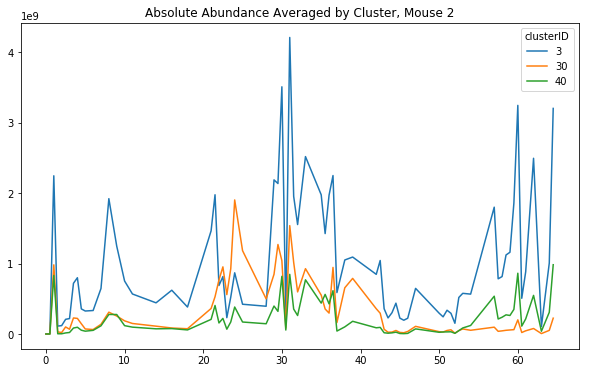

Compare Family/Genus taxonomy by clusters:


ClusterID                                         3  30  40  All
Family                Genus                                     
Acidaminococcaceae    Phascolarctobacterium       0   0   3    3
Bacteroidaceae        Bacteroides                28   0   0   28
Bdellovibrionaceae    Vampirovibrio               0   1   0    1
Clostridiaceae_1      Clostridium_sensu_stricto   0   0   3    3
Coriobacteriaceae     Collinsella                 0   0   1    1
Desulfovibrionaceae   Bilophila                   0   2   0    2
Enterobacteriaceae    Escherichia/Shigella        0   2   0    2
                      Salmonella                  0   1   0    1
Erysipelotrichaceae   Clostridium_XVIII           0   1   0    1
                      Coprobacillus               0   0   1    1
                      Holdemania                  0   0   3    3
                      Turicibacter                0   0   2    2
Eubacteriaceae        Eubacterium                 0   2   0    2
Lachnospiraceae       Anaerostipes                0   0   1    1
                      Blautia                     0   9   0    9
                      Clostridium_XlVa            0   0  24   24
                      Clostridium_XlVb            0   1   0    1
                      Coprococcus                 0   0   1    1
                      Lactonifactor               0   0   2    2
                      Roseburia                   0   0   2    2
                      Ruminococcus2               0   0   3    3
Oxalobacteraceae      Oxalobacter                 0   0   1    1
Peptostreptococcaceae Clostridium_XI              0   3   0    3
Porphyromonadaceae    Barnesiella                 2   0   0    2
                      Butyricimonas               3   3   0    6
                      Odoribacter                 1   2   0    3
                      Parabacteroides             9   0   0    9
Prevotellaceae        Paraprevotella              5   0   0    5
Rikenellaceae         Alistipes                   6   0   1    7
Ruminococcaceae       Acetanaerobacterium         0   1   0    1
                      Anaerofilum                 0   0   1    1
                      Butyricicoccus              0   0   4    4
                      Clostridium_III             0   0   1    1
                      Clostridium_IV              0   1   3    4
                      Faecalibacterium            0   0   3    3
                      Flavonifractor              0   4   0    4
                      Oscillibacter               0   1   1    2
                      Pseudoflavonifractor        0   3   0    3
                      Ruminococcus                0   2   0    2
                      Subdoligranulum             0   1   0    1
Streptococcaceae      Lactococcus                 0   1   0    1
Sutterellaceae        Parasutterella              0   0   2    2
                      Sutterella                  0   0   1    1
Verrucomicrobiaceae   Akkermansia                 0   4   0    4
All                                              54  45  64  163

In [22]:
cluster_viz(df, kmclusters)

Visualizing abundances over time by clusters:


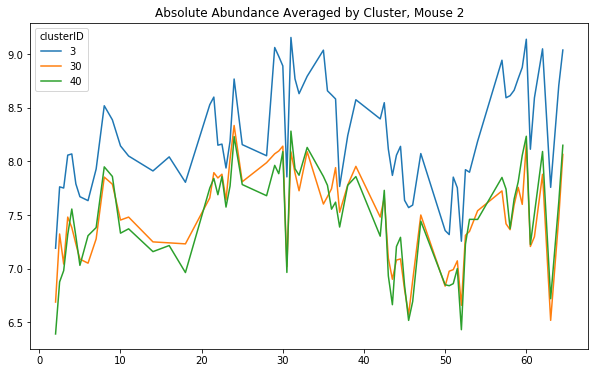

In [23]:
cluster_viz(log10_df, kmclusters, False)

Observations: 

- it is very (biologically) interesting that we can observe very separated trajectories of the absolute abundances among the clusters!
- Although note that since we are plotting the average absolute abundance in each cluster, one of the cluster trajectories (#78) could be driven by the one or two of the OTUs that were very different from the rest as observed from the pre-processing visualizations. But the log-transformed plot still show us this separation of trajectories among the clusters, so the averaging here is more trustworthy.
- It is interesting to see how the taxonomy of these OTUs play out in the clustering. We see that all the *Bacteroidaceae/Bacteroides* naturally cluster together, and *Clostridium_XIVa* largely cluster together in one but a few of them are clustered together in another.
- Overall, the clusters are well-balanced, i.e. almost equal number of OTUs in each cluster.

### 2. Construct (molecular) phylogenetic trees: starting with neighbor-joining (NJ) method

Here, we are further considering an agglomerative clustering method to determine our distance matrix to then again partition the OTUs using k-medoids. The neighbor-joining algorithm is a common method for creating phylogenetic trees in the field of bioinformatics. This is also more robust than the other common method called unweighted pair group method with arithmetic mean (UPGMA) in that the neighbor-joining algorithm does not require the OTUs to be ultrametric.

In [28]:
# Construct the phylogenetic tree using neighbor-joining algorithm (does not require ultrametric data)
# alternatively: 'upgma' for Unweighted Pair Group Method with Arithmetic Mean
constructor = DistanceTreeConstructor(calculator, 'nj') 
tree = constructor.build_tree(otu_aln) # directly from the raw alignment

In [221]:
# use distance matrix to construct tree
# constructor = DistanceTreeConstructor()
# tree = constructor.nj(dm)
# Phylo.draw(tree) # draws the phylogenetic tree within a box

In [234]:
# save tree as a pickle file
pickle.dump( tree, open( "OTU_tree_nj.p", "wb" ) )

# save tree in newick format
Phylo.write(tree, "OTU_tree_nj.nwk", "newick")

In [237]:
# load tree from a pickle file
# tree = pickle.load( open( "OTU_tree_nj.p", "rb" ) )

# load tree from a newick file
tree = Phylo.read("OTU_tree_nj.nwk", 'newick')

In [238]:
Phylo.draw_ascii(tree) # draws the tree in ascii

 , Lactonifactor_OTU_303
 |
 | _ Lactonifactor_OTU_63
 ,|
 || , Roseburia_OTU_305
 ||_|
 |  | Roseburia_OTU_59
 |
 |, Clostridium_XlVa_OTU_100
 ,|
 || Clostridium_XlVa_OTU_90
 |
 |, Ruminococcus2_OTU_294
 ||
 || Coprococcus_OTU_28
 |
 | _ Blautia_OTU_81
 ||
 ||, Blautia_OTU_104
 |||
 ||| Blautia_OTU_50
 ||
 ||_ Blautia_OTU_167
 ||
 || Blautia_OTU_49
 ,|
 ||, nan_OTU_181
 |,|
 |||, Blautia_OTU_214
 ||||
 || | Blautia_OTU_33
 ||
 ||, nan_OTU_254
 |||
 | , Blautia_OTU_316
 | |
 | | Blautia_OTU_20
 |
 | _ Clostridium_XlVa_OTU_102
 ,|
 ||_ Clostridium_XlVa_OTU_47
 |
 | __ nan_OTU_241
 ||
 ||__ Anaerostipes_OTU_113
 ||
 ||_____ nan_OTU_259
 ||
 ||  _ Clostridium_III_OTU_174
 ||,|
 ||||___ nan_OTU_135
 |||
 |||    , Butyricicoccus_OTU_273
 ||| ___|
 ||||   , Butyricicoccus_OTU_275
 ||||   |
 ||||   , Butyricicoccus_OTU_262
 ||||   |
 ||||   | Butyricicoccus_OTU_261
 ||||
 ||||  _ nan_OTU_221
 ||||,|
 |||||| , Pseudoflavonifractor_OTU_208
 ||||||_|
 |||||  | Pseudoflavonifractor_OTU_145
 |||||

#### Most parsimonious tree using nearest neighbor interchange (NNI)

Well, that was too easy and I don't know if I like this tree construction. Let's continue building more trees until we have found the most parsimonious tree, using this neighbor-joining tree we have just found as the starting tree. Below, we have used the Fitch algorithm to score how parsimony the tree is, and using the Nearest Neighbor Interchange (NNI) algorithm to evaluate the parsimony score and find us the best tree.

In [228]:
# search for the best tree that minimize the parsimony score
scorer = ParsimonyScorer() # default uses Fitch algorithm
searcher = NNITreeSearcher(scorer)
constructor = ParsimonyTreeConstructor(searcher, tree) # using the above tree as the starting tree
pars_tree = constructor.build_tree(otu_aln)

In [232]:
# save tree as a pickle file
pickle.dump( pars_tree, open( "OTU_tree_best.p", "wb" ) )

# save tree using newick format
Phylo.write(pars_tree, "OTU_tree_best.nwk", "newick")

In [29]:
# load tree from a pickle file
# pars_tree = pickle.load( open( "OTU_tree_best.p", "rb" ) )

# load tree from a newick file
pars_tree = Phylo.read("OTU_tree_best.nwk", 'newick')

In [30]:
Phylo.draw_ascii(pars_tree)

                       ______ nan_OTU_35
                      |
                      |    _ Clostridium_XI_OTU_62
                     _| __|
                    | ||  | , Clostridium_XI_OTU_108
                    | ||  |_|
                    | ||    | Clostridium_XI_OTU_170
                    | ||
                    |  |     __ Eubacterium_OTU_194
                   ,|  |   ,|
                   ||  |  ,||_ Eubacterium_OTU_301
                   ||  |  ||
                   ||  |__||__ nan_OTU_337
                   ||     |
                   ||     |____ nan_OTU_324
                  ,||
                  |||______ Lactococcus_OTU_184
                  ||
                  ||        __ Coprobacillus_OTU_72
                  || ______|
                  |||      |__ Clostridium_XVIII_OTU_77
                  |||
                  |||        , Holdemania_OTU_37
                  | | _______|
                  | ||       |, Holdemania_OTU_79
                  | ||       ||
      

#### Distance matrix using branch lengths

Now that we have found the most parsimonious tree, we will recreate a new distance matrix by calculating the total branch length between every two OTUs. Then feed this new distance matrix into the previously described k-medoids clustering algorithm to determine our new clusters of OTUs.

In [31]:
# checking the distance function that calculates the sum of branch lengths between two targets
print(pars_tree.distance('Parasutterella_OTU_179', 'Collinsella_OTU_299'))

0.31644


In [32]:
# list of the genus+OTU names
Targets = [str(otu_tax['Genus'][i])+"_"+str(otu_tax.index.values[i]) for i in range(otu_tax.shape[0])]

In [33]:
tree_dm = [] # a list of rows containing lower triangular part of the distance matrix
Targets_cum = [] # running list of previous OTUs in the list of targets
for target in Targets:
    Targets_cum.append(target) 
    dm = [] # distance matrix for each target
    for previous in Targets_cum:
        if previous != target:
            dm.append(pars_tree.distance(previous, target))
    tree_dm.append(np.array(dm))

In [34]:
len(tree_dm)

202

In [251]:
# save distance matrix as a pickle file
pickle.dump( tree_dm, open( "OTU_tree_best_dm.p", "wb" ) )

In [49]:
# load distance matrix from a pickle file
tree_dm = pickle.load( open( "OTU_tree_best_dm.p", "rb" ) )

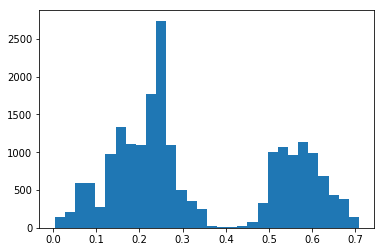

In [35]:
# check distribution of the distances - should be approximately normal
plt.hist(np.concatenate(tree_dm).ravel(), bins=30)
plt.show()

Again, the distance distribution appears to be bimodal and actually quite similar to the previous distance matrix directly calculated from the sequence alignments with the identity model.

#### K-medoids clustering on the distance matrix

In [66]:
# k-medoid clustering with 6 number of clusters
kmclusters, err, _ = kmedoids(tree_dm, nclusters=6, npass=10)
print(kmclusters)
print("---")
print("Within-cluster sum of distances:", err)

[105 105  40 105  40  40 105 105 105 105 105 105 105 105  40 105 118  17
 105  40 105 105  40  40  40 118 174 118 105  40  40 105 118 105 118 118
  40  17 118  40  40 105  40  40  40 105  40  40 105 105  40  40 174 105
  40 118 174 105 105 105 105 105 118  40  40 105 118  40 118  40  40  40
  40 118  40 174 105  40 105 118  40 174 105  40 105  40 118  40 118  40
  40  40  17  40  17  40  40  40  40 118 118 105  40  40  40 105  40  40
  40  40  40  40 118  40  40 105  40 118 118  40 118 118 118  40  40 118
  17 118 118  40 105 118  40  40  40  40  40 137  40  40 105 118  40 105
 105 137  40  17  40 105  40  40  40  40  40 118  40  40 137 118  40  40
  40 118  40  40 105  40 118 118  40 174  40 118 174  40 174  40  40  17
  40 118  40  40  40 118 105 118 105 118 105  40 118  40  40  40 118  40
  40 118  40  40]
---
Within-cluster sum of distances: 27.46476000000001


In [36]:
# k-medoid clustering with 4 number of clusters
kmclusters, err, _ = kmedoids(tree_dm, nclusters=4, npass=10)
print(kmclusters)
print("---")
print("Within-cluster sum of distances:", err)

[105 105 175 105 175 175 105 105 105 105 105 105 105 105 175 105 175  40
 105  40 105 105 175 175  40 175  40 175 105 175  40 105 175 105 175 175
 175  40 175  40  40 105  98 175  40 105  40  40 105 105  40  40  40 105
  40 175  40 105 105 105 105 105 175 175  40 105 175 175 175  40 175 175
  40 175  98  40 105 175 105 175 175  40 105  40 105  40 175  40 175  40
 175 175  40  40  40 175  40 175  98 175 175 105  40 175 175 105  40 175
  40 175 175  40 175  40 175 105  40 175 175  40 175 175 175 175  40 175
  40 175 175  40 105 175  98 175 175 175  40  40  40  40 105 175  40 105
 105  40 175  40 175 105 175 175  40  40  40 175 175  40  40 175  40  40
  40 175 175  40 105  40 175 175  40  40 175 175  40 175  40 175  40  40
 175 175 175 175 175 175 105 175 105 175 105 175 175 175 175 175 175 175
 175 175 175 175]
---
Within-cluster sum of distances: 38.87065


In [97]:
# save clusterIDs as a pickle file
pickle.dump( kmclusters, open( "OTU_tree_kmclusters.p", "wb" ) )

In [92]:
# load clusterIDs from a pickle file
kmclusters = pickle.load( open( "OTU_tree_kmclusters.p", "rb" ) )

In [37]:
kmclusters.shape

(202,)

In [38]:
df.shape

(202, 76)

Merged cluster IDs with dataframe:


,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5,clusterID
OTU_1,3.258519e+06,1.435422e+07,1.398210e+10,3.741737e+07,6.611759e+07,3.981310e+08,7.523933e+08,3.601429e+09,6.517636e+09,2.555167e+09,...,4.872160e+09,7.579320e+09,1.177070e+10,4.967445e+09,2.115524e+09,5.711787e+09,2.029287e+08,1.957336e+09,6.490826e+09,105
OTU_2,5.361366e+05,3.597276e+06,1.074313e+10,8.726195e+08,1.406977e+09,2.274333e+09,1.557107e+09,3.872735e+09,2.126074e+09,7.952141e+08,...,8.608057e+07,0.000000e+00,5.738306e+08,4.153618e+09,1.231788e+08,2.051707e+09,1.583057e+08,2.944150e+09,1.129506e+10,105
OTU_3,2.978537e+04,3.488268e+04,8.017258e+07,5.234554e+06,1.652940e+07,1.144524e+07,2.502290e+07,6.309442e+07,7.062454e+07,3.170504e+07,...,2.065934e+07,1.477450e+07,1.434577e+08,1.162610e+07,3.724010e+07,5.670547e+07,1.416605e+06,1.629174e+07,2.044355e+08,175
OTU_4,8.935610e+03,0.000000e+00,7.215532e+07,6.203916e+06,2.896176e+07,1.038247e+08,1.114657e+08,4.555417e+08,9.841575e+08,5.635732e+08,...,2.152703e+10,4.139323e+10,6.686561e+10,7.022940e+09,1.756444e+10,5.639616e+10,2.149699e+09,2.288291e+10,6.900549e+10,105
OTU_5,1.787122e+04,5.668436e+04,1.563365e+09,1.002320e+08,1.051100e+08,1.922392e+09,3.196107e+09,1.084214e+10,1.064138e+10,7.750264e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,3.100293e+06,1.432312e+06,5.155042e+06,2.833211e+06,2.327391e+06,0.000000e+00,175


Visualizing abundances over time by clusters:


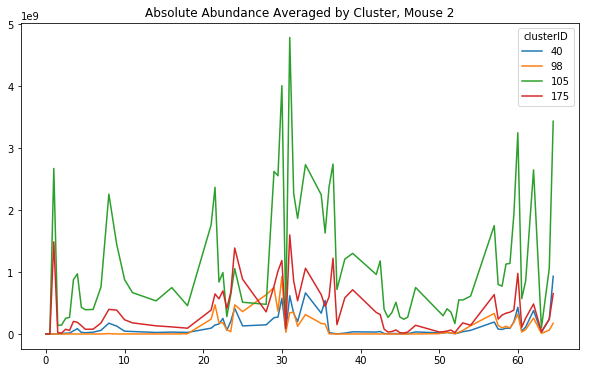

Compare Family/Genus taxonomy by clusters:


ClusterID                                        40  98  105  175  All
Family                Genus                                           
Acidaminococcaceae    Phascolarctobacterium       0   0    0    3    3
Bacteroidaceae        Bacteroides                 0   0   27    1   28
Bdellovibrionaceae    Vampirovibrio               0   0    0    1    1
Clostridiaceae_1      Clostridium_sensu_stricto   0   0    0    3    3
Coriobacteriaceae     Collinsella                 0   0    0    1    1
Desulfovibrionaceae   Bilophila                   0   0    0    2    2
Enterobacteriaceae    Escherichia/Shigella        0   0    0    2    2
                      Salmonella                  0   0    0    1    1
Erysipelotrichaceae   Clostridium_XVIII           0   0    0    1    1
                      Coprobacillus               0   0    0    1    1
                      Holdemania                  0   0    0    3    3
                      Turicibacter                0   0    0    2    2
Eubacteriaceae        Eubacterium                 0   0    0    2    2
Lachnospiraceae       Anaerostipes                1   0    0    0    1
                      Blautia                     9   0    0    0    9
                      Clostridium_XlVa           18   4    0    2   24
                      Clostridium_XlVb            0   0    0    1    1
                      Coprococcus                 1   0    0    0    1
                      Lactonifactor               2   0    0    0    2
                      Roseburia                   2   0    0    0    2
                      Ruminococcus2               3   0    0    0    3
Oxalobacteraceae      Oxalobacter                 0   0    0    1    1
Peptostreptococcaceae Clostridium_XI              0   0    0    3    3
Porphyromonadaceae    Barnesiella                 0   0    2    0    2
                      Butyricimonas               0   0    0    6    6
                      Odoribacter                 0   0    0    3    3
                      Parabacteroides             0   0    9    0    9
Prevotellaceae        Paraprevotella              0   0    0    5    5
Rikenellaceae         Alistipes                   0   0    6    1    7
Ruminococcaceae       Acetanaerobacterium         0   0    0    1    1
                      Anaerofilum                 0   0    0    1    1
                      Butyricicoccus              4   0    0    0    4
                      Clostridium_III             1   0    0    0    1
                      Clostridium_IV              0   0    0    4    4
                      Faecalibacterium            0   0    0    3    3
                      Flavonifractor              4   0    0    0    4
                      Oscillibacter               2   0    0    0    2
                      Pseudoflavonifractor        3   0    0    0    3
                      Ruminococcus                0   0    0    2    2
                      Subdoligranulum             0   0    0    1    1
Streptococcaceae      Lactococcus                 0   0    0    1    1
Sutterellaceae        Parasutterella              0   0    0    2    2
                      Sutterella                  0   0    0    1    1
Verrucomicrobiaceae   Akkermansia                 0   0    0    4    4
All                                              50   4   44   65  163

In [39]:
cluster_viz(df, kmclusters)

Visualizing abundances over time by clusters:


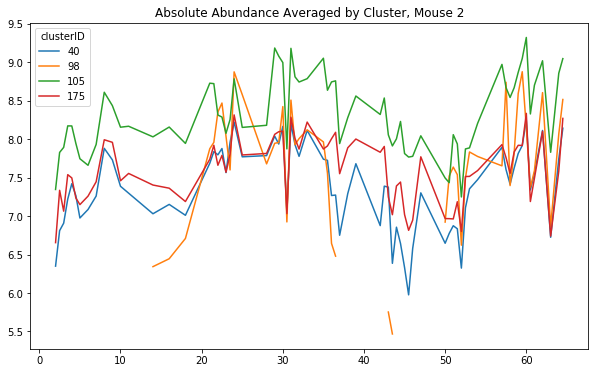

In [40]:
cluster_viz(log10_df, kmclusters, False)

Observations:

- No matter how many number of clusters we want to split the OTUs into, the resulting k-medoids clusters are highly imbalanced.
- I'm showing the best clustering results above (k=4), where 3 out of the 4 are more similar in the number of OTUs but the last one (#4) only has 4 OTUs in the cluster (all of which are *Clostridium_XlVa*).
- The greatest decrease in the within-cluster sum of distances occurs from k=4 to k=5. But having 5 clusters creates even more imbalanced clusters.
- The absolute abundance trajectories among any of the resulting number of clusters are always overlapping. As you can see from the plots above, 3 of the 4 clusters overlap a lot in their trajectories.

## Conclusion/Discussion

Moving forward with the modeling, we will use the OTU cluster assignments determined from performing k-medoids on the distance matrix directly calculated on the sequence alignments using the identity model in (1), rather than the one calculated from branch lengths of the phylogenetic tree in (2). Not only are the clusters from (1) actually balanced, but those clusters also make the most biological sense: that the absolute abundance trajectories are distinguishable among clusters and the taxonomy of the OTUs are also identifiable among clusters. We lack sufficient biological knowledge to be able to discuss why using the most parsimonious tree as an agglomerative clustering method did not provide better clustering (in terms of having balanced clusters and biologically), more exploration in different phylogenetic tree constructions may be considered in the future. But so far as a result of this clustering analysis, we can conclude that using the distance matrix directly calculated on the sequence alignments using the identity model in (1) is sufficient in determining well-balanced clusters that make biological sense, which will be informative in modeling the dynamics of the OTUs over time. Another advantage is that (1) is a lot quicker and more straight forward than having to construct and find the most parsimonious tree (the NNI algorithm took about an hour or so to run). So moving forward with our project, we can implement (1) to determine cluster assignments on the OTUs in the IBD mouse dataset!

### Implement clustering pipeline from (1) on IBD mouse data

In [24]:
# load IBD mouse data
with open('data/mouse_set_2_data.pkl', 'rb') as handle:
    mouse_set_2 = pickle.load(handle) 

# extract otu dataframe
otu_tax = mouse_set_2['otu_taxonomy']

# Find the longest sequence length so we can add padding to sequences shorter than this
longest_length = max(len(s) for s in otu_tax['sequence'])
longest_length # check this -- should be the same as healthy OTUs

254

In [25]:
# Iterate through the OTU_taxonomy dataframe to store their sequences into Bio SeqRecord objects
SeqRecordList = []
for i in range(otu_tax.shape[0]):
    record = SeqRecord(Seq(otu_tax['sequence'][i].ljust(longest_length, '-')), # left align, pad the end
                       id=str(otu_tax['Genus'][i])+"_"+str(otu_tax.index.values[i]), 
                       annotations={"Family": otu_tax['Family'][i], "Genus": otu_tax['Genus'][i]})
    SeqRecordList.append(record)

# Store all SeqRecord objects into Bio alignment object
otu_aln = MultipleSeqAlignment(SeqRecordList)

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(otu_aln)

np.array(dm).shape

(176, 176)

/usr/share/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/share/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 112.,  289.,  797., 1255.,  352.,  293., 1122.,  980.,  787.,
         621., 1453., 1874., 1681.,  325.,  161.,   96.,   14.,    4.,
           2.,    2.,    0.,    0.,    2.,   51.,  300.,  672.,  992.,
         901.,  232.,   30.]),
 array([0.00393701, 0.02493438, 0.04593176, 0.06692913, 0.08792651,
        0.10892388, 0.12992126, 0.15091864, 0.17191601, 0.19291339,
        0.21391076, 0.23490814, 0.25590551, 0.27690289, 0.29790026,
        0.31889764, 0.33989501, 0.36089239, 0.38188976, 0.40288714,
        0.42388451, 0.44488189, 0.46587927, 0.48687664, 0.50787402,
        0.52887139, 0.54986877, 0.57086614, 0.59186352, 0.61286089,
        0.63385827]),
 <a list of 30 Patch objects>)

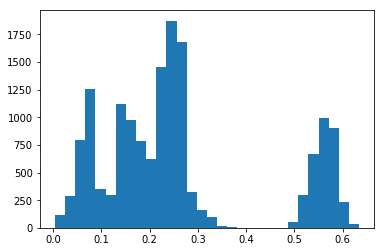

In [26]:
# checking distribution of the distances 
dm_tril = np.tril(dm) # grab the lower triangle of the matrix
dm_tril[dm_tril == 0] = np.nan # set zeros to nan
dm_tril = dm_tril.reshape(176*176) # reshape for plotting
plt.hist(dm_tril, bins=30)

In [98]:
# k-medoid clustering with 3 number of clusters
kmclusters, err, _ = kmedoids(dm, nclusters=3, npass=50)
print(kmclusters)
print("---")
print("Within-cluster sum of distances:", err)

[ 1  1 85  1 85 46  1  1  1  1  1  1  1  1 85  1 46 46  1 85  1  1 46 85
 46 46 85  1  1 85 85  1 46  1 46 85 85 46 46 85 46  1 85 85 46 85 46  1
 46 46 85 85 85  1  1 85 85 46 46 46  1 46 46 46 85 85 85 46 85 46 46 46
  1 85 85 46 46 46 46 46 85 85 85 85 85 85 85 46 46 46  1 85 46 46 46 85
 46 46 46 85 85 46 85 85  1 46 85 46 46 85 46 85  1  1 46 46 46 85 85 85
 46 85 46 85 46 46 46 46 46 85 46 46 85 46 46 85 85 85 85 85 46 85 85  1
 46 46 85 46 85 85 46  1 85 85 85 85 46 46 85 85 85 46 85 46 85 85 46 85
 85 46 85 85 46 85 85 85]
---
Within-cluster sum of distances: 25.9724409448819


In [95]:
# save clusterIDs as a pickle file
pickle.dump( kmclusters, open( "OTU_dm_kmclusters_IBD.p", "wb" ) )

In [27]:
# load clusterIDs from a pickle file
kmclusters = pickle.load( open( "OTU_dm_kmclusters_IBD.p", "rb" ) )

In [28]:
kmclusters.shape

(176,)

#### Visualize on one of the IBD mouse

In [29]:
# unfold more dataframes from IBD data
reads = mouse_set_2['reads']
qpcr = mouse_set_2['qpcr']
times = mouse_set_2['times']

# organize IBD mouse 6
mouse_id = '6'
mouse_reads_df = reads[mouse_id]
m_total_amount = qpcr[mouse_id]['mean'].values
all_OTU = list(mouse_reads_df.index)

m_reads_values=reads[mouse_id].values
m_reads_values_sum=sum(m_reads_values)

m_all_abs_amount = np.zeros((len(all_OTU), len(times)))
for idx, otu in enumerate(all_OTU):
    these_reads = mouse_reads_df.loc[otu]
    this_relative_abundance = these_reads.values/m_reads_values_sum
    this_abs_abundance = this_relative_abundance * m_total_amount
    
    m_all_abs_amount[idx,:] = this_abs_abundance
    
m_all_abs_amount_z = zscore(m_all_abs_amount, axis = 1)

# store absolute abundance as a pandas dataframe
df = pd.DataFrame(m_all_abs_amount, index=mouse_reads_df.index.values, columns=times)
display(df.head())
print(df.shape)

,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,58.5,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5
OTU_1,1.816067e+06,3.934490e+09,8.664206e+08,1.407984e+10,6.712063e+09,1.078012e+10,1.361928e+10,1.444394e+10,2.657430e+10,5.676047e+09,...,3.492513e+10,1.429107e+10,7.557803e+09,2.610323e+10,2.091689e+10,2.136574e+10,6.136861e+10,1.797424e+10,1.445119e+10,8.796604e+09
OTU_2,1.975493e+06,5.540443e+08,2.286325e+08,6.083740e+09,3.482784e+09,6.684780e+09,8.943674e+09,1.222704e+10,2.124291e+10,4.555639e+09,...,2.102186e+10,3.444700e+09,5.485316e+09,9.751851e+08,6.173139e+09,1.366946e+10,3.931464e+09,8.973803e+09,1.371166e+10,1.758099e+10
OTU_3,6.411687e+04,2.115570e+06,1.678985e+06,3.346313e+09,4.585444e+09,1.064897e+10,9.287845e+09,2.180744e+10,3.014474e+10,4.332586e+09,...,2.272633e+07,7.907165e+06,6.341406e+06,1.496831e+06,1.284240e+07,4.236301e+07,3.147108e+07,2.219316e+07,1.967709e+07,3.490024e+06
OTU_4,1.334324e+05,0.000000e+00,2.583053e+05,2.558343e+06,0.000000e+00,0.000000e+00,3.472091e+06,3.859951e+06,0.000000e+00,4.111588e+06,...,5.926328e+08,1.468474e+07,3.631896e+07,4.415650e+07,1.013874e+07,6.699267e+07,7.504643e+07,1.775453e+07,4.755298e+07,6.456544e+07
OTU_5,1.611586e+05,1.175317e+06,1.291527e+05,2.238550e+07,3.313781e+06,1.345162e+07,6.510171e+06,1.415316e+07,1.257828e+07,5.139485e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,1.496831e+06,0.000000e+00,1.970373e+06,1.210426e+07,3.328974e+06,1.475782e+07,1.047007e+07


(176, 73)


In [30]:
np.seterr(divide = 'ignore') # to ignore log10(0) error since we will just ignore this for viz

# store log10-transformation of absolute abundance as another pandas dataframe (and ignoring first 4 time points)
log10_df = pd.DataFrame(np.log10(m_all_abs_amount[:,4:]), index=mouse_reads_df.index.values, columns=times[4:])
log10_df = log10_df.replace([np.inf, -np.inf], np.nan)
display(log10_df.head())

,2.5,3.0,3.5,4.0,4.5,5.0,6.0,7.0,8.0,9.0,...,58.5,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5
OTU_1,9.826856,10.032624,10.134154,10.159686,10.424462,9.754046,9.995471,10.320815,10.397478,10.648476,...,10.543138,10.155065,9.878396,10.416694,10.320497,10.329718,10.787946,10.254650,10.159903,9.944315
OTU_2,9.541927,9.825087,9.951516,10.087321,10.327214,9.658549,9.846434,10.216039,10.228129,10.332634,...,10.322671,9.537151,9.739202,8.989087,9.790506,10.135751,9.594554,9.952977,10.137090,10.245043
OTU_3,9.661381,10.027308,9.967915,10.338605,10.479212,9.636747,9.918814,10.445957,10.018429,10.737732,...,7.356529,6.898021,6.802186,6.175173,7.108646,7.626987,7.497912,7.346219,7.293961,6.542828
OTU_4,NaN,NaN,6.540591,6.586582,NaN,6.614010,NaN,6.894751,7.351911,7.503383,...,8.772786,7.166866,7.560133,7.644995,7.005984,7.826027,7.875330,7.249309,7.677178,7.810000
OTU_5,6.520324,7.128774,6.813592,7.150853,7.099621,6.710920,6.686453,7.292691,8.092273,8.047451,...,NaN,NaN,NaN,6.175173,NaN,6.294548,7.082938,6.522310,7.169022,7.019950


Merged cluster IDs with dataframe:


,0.0,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,59.0,59.5,60.0,60.5,61.0,62.0,63.0,64.0,64.5,clusterID
OTU_1,1.816067e+06,3.934490e+09,8.664206e+08,1.407984e+10,6.712063e+09,1.078012e+10,1.361928e+10,1.444394e+10,2.657430e+10,5.676047e+09,...,1.429107e+10,7.557803e+09,2.610323e+10,2.091689e+10,2.136574e+10,6.136861e+10,1.797424e+10,1.445119e+10,8.796604e+09,1
OTU_2,1.975493e+06,5.540443e+08,2.286325e+08,6.083740e+09,3.482784e+09,6.684780e+09,8.943674e+09,1.222704e+10,2.124291e+10,4.555639e+09,...,3.444700e+09,5.485316e+09,9.751851e+08,6.173139e+09,1.366946e+10,3.931464e+09,8.973803e+09,1.371166e+10,1.758099e+10,1
OTU_3,6.411687e+04,2.115570e+06,1.678985e+06,3.346313e+09,4.585444e+09,1.064897e+10,9.287845e+09,2.180744e+10,3.014474e+10,4.332586e+09,...,7.907165e+06,6.341406e+06,1.496831e+06,1.284240e+07,4.236301e+07,3.147108e+07,2.219316e+07,1.967709e+07,3.490024e+06,85
OTU_4,1.334324e+05,0.000000e+00,2.583053e+05,2.558343e+06,0.000000e+00,0.000000e+00,3.472091e+06,3.859951e+06,0.000000e+00,4.111588e+06,...,1.468474e+07,3.631896e+07,4.415650e+07,1.013874e+07,6.699267e+07,7.504643e+07,1.775453e+07,4.755298e+07,6.456544e+07,1
OTU_5,1.611586e+05,1.175317e+06,1.291527e+05,2.238550e+07,3.313781e+06,1.345162e+07,6.510171e+06,1.415316e+07,1.257828e+07,5.139485e+06,...,0.000000e+00,0.000000e+00,1.496831e+06,0.000000e+00,1.970373e+06,1.210426e+07,3.328974e+06,1.475782e+07,1.047007e+07,85


Visualizing abundances over time by clusters:


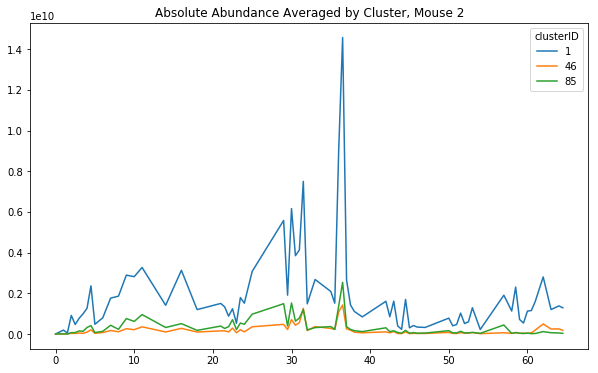

Compare Family/Genus taxonomy by clusters:


ClusterID                                         1  46  85  All
Family                Genus                                     
Acidaminococcaceae    Phascolarctobacterium       0   1   0    1
Bacteroidaceae        Bacteroides                19   0   0   19
Bifidobacteriaceae    Bifidobacterium             0   1   0    1
Clostridiaceae_1      Anaerosporobacter           0   1   0    1
                      Clostridium_sensu_stricto   0   0   3    3
Desulfovibrionaceae   Bilophila                   0   0   1    1
Enterobacteriaceae    Escherichia/Shigella        0   0   1    1
Enterococcaceae       Enterococcus                0   1   0    1
Erysipelotrichaceae   Clostridium_XVIII           0   0   1    1
                      Coprobacillus               0   3   0    3
                      Holdemania                  0   0   3    3
Eubacteriaceae        Eubacterium                 0   0   1    1
Lachnospiraceae       Anaerostipes                0   1   0    1
                      Blautia                     0   1  21   22
                      Clostridium_XlVa            0  23   1   24
                      Clostridium_XlVb            0   0   3    3
                      Coprococcus                 0   1   1    2
                      Dorea                       0   1   0    1
                      Lactonifactor               0   1   0    1
                      Roseburia                   0   0   3    3
                      Ruminococcus2               0   1   4    5
Peptostreptococcaceae Clostridium_XI              0   1   1    2
Porphyromonadaceae    Parabacteroides            10   0   0   10
Rikenellaceae         Alistipes                   2   0   0    2
Ruminococcaceae       Butyricicoccus              0   0   3    3
                      Clostridium_IV              0   2   0    2
                      Faecalibacterium            0   2   6    8
                      Flavonifractor              0   0   3    3
                      Gemmiger                    0   0   1    1
                      Oscillibacter               0   0   3    3
                      Pseudoflavonifractor        0   0   2    2
                      Ruminococcus                0   0   2    2
                      Subdoligranulum             0   0   1    1
Streptococcaceae      Lactococcus                 0   0   1    1
Sutterellaceae        Parasutterella              0   3   0    3
                      Sutterella                  0   2   0    2
Veillonellaceae       Dialister                   0   1   0    1
Verrucomicrobiaceae   Akkermansia                 0   0   7    7
All                                              31  47  73  151

In [31]:
cluster_viz(df, kmclusters)

Visualizing abundances over time by clusters:


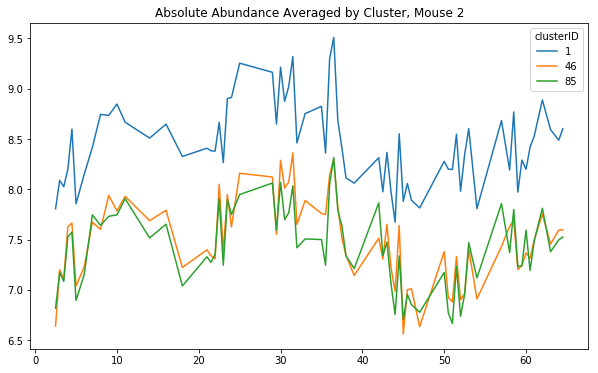

In [32]:
cluster_viz(log10_df, kmclusters, False)

Observations:

- From the distance matrix, we can again see the bimodal (actually more like trimodal) distribution of the distances. So we already know there would naturally be 2-3 clusters of the IBD OTUs.
- From the k-medoids clustering assignments, there is a very clear biological distinction in cluster #1 from the other two clusters:
    + The absolute abundance trajectory in this cluster is remarkably separated from the others (consistently higher over time)
    + This cluster entirely consists of the *Bacteroides*, *Parabacteroides*, and *Alistipes* genus, which actually all belong in the phylum *Bacteroidetes* and are gram-negative.

### Ending Remark

So in our subsequent notebooks, we will use the separate OTU clustering assignments for the healthy and the IBD mouse datasets. Specifically, they are the following files created in this notebook:

- `OTU_dm_kmclusters.p`
- `OTU_dm_kmclusters_IBD.p`